In [1]:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import seaborn as sns

We are trying to understand the impact of contact tracing on disease spread.

We have explored this topic in detail with simulations of contact tracing on a network.

Here, I will try to model the effect of contact tracing in a fully mixed population with epidemic modeled using dynamic equations.

First, the original SEIR model will be presented.

Second, the modifications for contact tracing will be introduced.

# Compartmental model

We are using a compartmental epidemiological that is a variation of the SEIR model.

We have introduced variations into order to model population heterogeneity.

## SEIR model

In this model, the individuals are either **Susceptible**, **Exposed**, **Infectious**, or **Recovered** (or Removed). We use $S$, $E$, $I$, and $R$ to denote the number of individuals in each compartment and $N$ to denote the total population.

There are several model parameters:

 * $\beta$, the average number of contacts by an individual per time step multiplied by the probability of disease transmission between an susceptible and infectious person.
 * $\alpha$, the inverse of the mean of the (exponentially distributed) incubation period for the disease
 * $\gamma$, the inverse of the mean of the (exponentially distributed) infectious period for the disease
 
Then the dynamic equations are:

[//]: # "Use better latex to line up equations here"
 
$\frac{dS}{dt} = - \beta \frac{I}{N} S$

$\frac{dE}{dt} = \beta \frac{I}{N} S - \alpha E$

$\frac{dI}{dt} = \alpha E - \gamma I$

$\frac{dR}{dt} = \gamma I$

In [2]:
# The SEIR model differential equations.
def SEIR_deriv(y, t, N, beta, alpha, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

We will set some parameters to use throughout this notebook

In [3]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0 = 0, 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, alpha, gamma = 0.2, 2./10, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

Using these equations we can simulate the model.

In [4]:
# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(SEIR_deriv, y0, t, args=(N, beta, alpha, gamma))
S, E, I, R = ret.T

S_benchmark = S

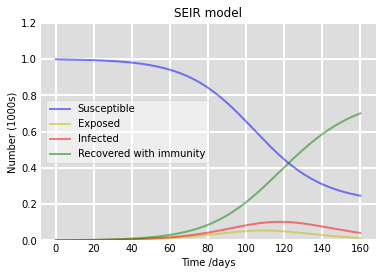

In [5]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SEIR model')
plt.show()

# SEIRM: Symptomaticity

In our study of contact tracing, we have introduced a number of new compartments and parameters:

 - A compartment, $M$, for Symptomatic.
 - A parameter, $\zeta$, for the rate at which the Infectious become Symptomatic

$\frac{dI}{dt} = \alpha E - \gamma I - \zeta I$

$\frac{dM}{dt} = \zeta I$

In [29]:
# The SEIRMQ model differential equations.
def SEIRM_deriv(y, t, N, beta, alpha, gamma, zeta):
    S, E, I, R, M = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - alpha * E
    dIdt = alpha * E - gamma * I - zeta * I
    dRdt = gamma * I
    dMdt = zeta * I
    # dQdt
    return dSdt, dEdt, dIdt, dRdt, dMdt

In [30]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0, M0 = 0, 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0 - M0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, alpha, gamma, zeta = 0.2, 2./10, .4/10 , .3/10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [31]:
# Initial conditions vector
y0 = S0, E0, I0, R0, M0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(SEIRM_deriv, y0, t, args=(N, beta, alpha, gamma, zeta))
S, E, I, R, M = ret.T

S_benchmark = S

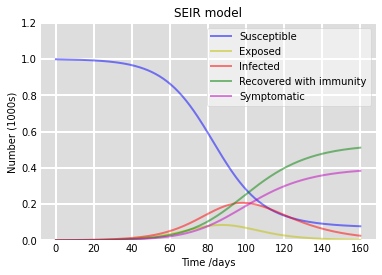

In [32]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, M/1000, 'm', alpha=0.5, lw=2, label='Symptomatic')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SEIRM model')
plt.show()

# SEIRMQ: Quarantining and contact tracing

The contact tracing logic we have adopted is that when an agent is Symptomatic, they are immediately tested and Quarantined.

Then, traced contact edges with the newly quaratined person are recursively followed, tested, and quarantined.

The overall effect is to more rapidly reduce the number of Infected and Exposed people from the population, moving them into a Quarantine state.

Can this be rendered in the compartmental epidemiological form?

We have the advantage that the compartmental model can assume an "infinite" epidemic field in which there are no size effects. This enables us to use the parameters to create point rates for what are otherwise average effects from network structure and disease parameters combined.

Consider a number of traced contact tracing period $T$, and a contact tracing rate $c$.

Every time an agent becomes Symptomatic,
 
 - their chain of prior "upstream" contacts from $i \in {0,...,T}$ $t - 0$ backwards to $t - T$ gets tested and quarantined. These will be either Infected or Recovered/Symptomatic themselves.
 - their chain of "downstream" contacts $t + i$ is also tested. If they are Exposed of Infected, they are Quarantined.
 
So we need to model the additional removals from each Infected and Exposed pool, scaled properly given the rates.

From "backwards" contacts, the probable number of upstream contacts being Infected, and therefore eligible for Quarantine:

$\sum_{i = 0}^{T} \text{upstream chance of being Infected} = \sum_{i = 0}^{T} ((1 - \gamma)(1 - \zeta)) ^ i$

From "forwards" contacts, the probable number of downstream of being Exposed (and therefore eligible for Quarantine):

$\sum_{i = 0}^{T} \text{downstream chance of being Exposed} = \sum_{i = 0}^{T} \beta (1 - \alpha) ^ i$

From "forwards" contacts, the probable number of downstream of being Infected (and therefore eligible for Quarantine):

$\sum_{i = 0}^{T} \text{downstream chance of being Infected} = \sum_{i = 0}^{T} \beta \alpha ^ i$

This leads to a revision of the dynamic equations

$\frac{dS}{dt} = - \beta \frac{I}{N} S$

$\frac{dE}{dt} = \beta \frac{I}{N} S - \alpha E - \zeta I \sum_{i = 0}^{T} \beta (1 - \alpha) ^ i c ^ {i + 1}$

$\frac{dI}{dt} = \alpha E - \gamma I - \zeta I \sum_{i = 0}^{T} (1 - \gamma)^i (1 - \zeta) ^ i c ^ {i + 1} - \zeta I \sum_{i = 0}^{T}  \beta \alpha ^ i c ^ {i + 1}$

$\frac{dR}{dt} = \gamma I$

$\frac{dI}{dt} = \alpha E - \gamma I$

$\frac{dM}{dt} = \zeta I$

$\frac{dQ}{dt} = \zeta I \sum_{i = 0}^{T} \beta (1 - \alpha) ^ i c ^ {i + 1} +  \zeta I \sum_{i = 0}^{T} (1 - \gamma)^ i (1 - \zeta) ^ i c ^ {i + 1} + \zeta I \sum_{i = 0}^{T}  \beta \alpha ^ i c ^ {i + 1} $ 


**These equations are not quite right because of the probability of overlapping tracing zones. These are being assumed away because of the 'infinite scale'.**

In [106]:
# The SEIRMQ model differential equations.
def SEIRMQ_deriv(y, t, N, beta, alpha, gamma, zeta, c, T):
    S, E, I, R, M, Q = y

    dSdt = -beta * S * I / N
    
    downstream_dQ_E = zeta * I * sum([ beta * (1 - alpha) ** i * c ** (i + 1) for i in range(T)])
    downstream_dQ_I = zeta * I * sum([ beta * alpha ** i * c ** (i + 1) for i in range(T)])
    upstream_dQ_I = zeta * I * sum([(1 - gamma) ** i * (1 - zeta) ** i * c ** (i + 1) for i in range(T)])
    
    dEdt = beta * S * I / N - alpha * E - upstream_dQ_I
    dIdt = alpha * E - gamma * I - zeta * I - downstream_dQ_I - upstream_dQ_I

    dRdt = gamma * I
    dMdt = zeta * I
    
    dQdt = downstream_dQ_E + downstream_dQ_I + upstream_dQ_I
    
    return dSdt, dEdt, dIdt, dRdt, dMdt, dQdt

In [134]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0, M0, Q0 = 0, 1, 0, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0 - M0 - Q0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, alpha, gamma, zeta, c, T = 0.25, 2./10, .3/10 , .1/10, 1, 3
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [135]:
# Initial conditions vector
y0 = S0, E0, I0, R0, M0, Q0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(SEIRMQ_deriv, y0, t, args=(N, beta, alpha, gamma, zeta, c, T))
S, E, I, R, M, Q = ret.T

S_benchmark = S

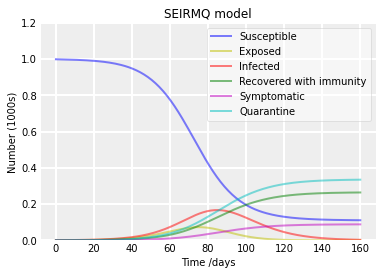

In [136]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#eeeeee', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, M/1000, 'm', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t,Q/1000, 'c', alpha=0.5, lw=2, label='Quarantine')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SEIRMQ model')
plt.show()